# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving 김치전.jpg to 김치전.jpg


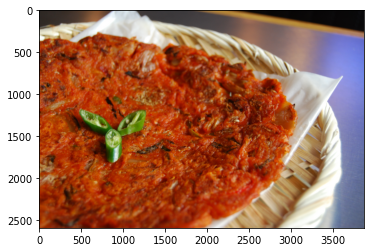

In [10]:
img = Image.open('김치전.jpg')
plt.imshow(img);

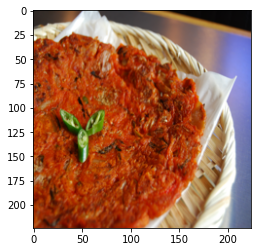

In [12]:
img = img.resize((224,224))
plt.imshow(img);

In [13]:
np.array(img).shape

(224, 224, 3)

- 이미지 예측

In [15]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02869837', 'bonnet', 0.4640495),
   ('n04209133', 'shower_cap', 0.18806027),
   ('n07714571', 'head_cabbage', 0.06981934),
   ('n03958227', 'plastic_bag', 0.05996093),
   ('n03530642', 'honeycomb', 0.041812595)]])

- 이미지를 중앙으로 위치하여 자르기

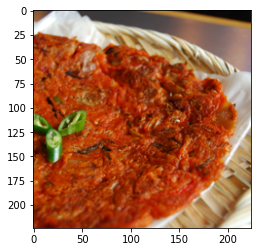

In [23]:
from image_util import center_image
img = Image.open('김치전.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [24]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n04209133', 'shower_cap', 0.88565725),
   ('n02869837', 'bonnet', 0.04810473),
   ('n07714571', 'head_cabbage', 0.015293125),
   ('n03534580', 'hoopskirt', 0.0073342384),
   ('n03450230', 'gown', 0.004031372)]])